In [182]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

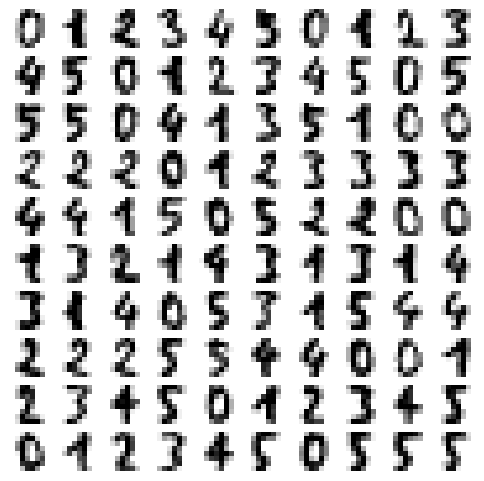

In [183]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.show

In [225]:
import numpy as np

rand_seen = 28
rnd = np.random.RandomState(28)

n_instance = X.shape[0]
n_feature = X.shape[1]

# Hidden layer
n_node_h = 50
weight_h = rnd.uniform(0, 1, [n_node_h, n_feature])
bias_h = 1

n_classes = len(np.unique(y))

y_onehot = np.zeros([n_instance, n_classes])
for i, val in enumerate(y):
    y_onehot[i, val] = 1

n_node_out = n_classes
weight_out = rnd.random([n_node_out, n_node_h])
bias_out = 1

## Feed Forward

In [226]:
z_h = X.dot(weight_h.T) + bias_h
z_h.shape

(1083, 50)

In [227]:
a_h = 1 / (1 + np.exp(-z_h))
a_h.shape

(1083, 50)

In [228]:
z_out = a_h.dot(weight_out.T) + bias_out
a_out = 1 / (1 + np.exp(-z_out))
a_out.shape

(1083, 6)

## Backpropagation

In [229]:
logloss = (y_onehot * np.log(a_out)) + ((1 - y_onehot) * np.log(1 - a_out))
logloss.shape

(1083, 6)